In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv("datasets/dataset1.csv")
df2=pd.read_csv("datasets/dataset2.csv")

C:\Users\parth\AppData\Local\Temp\ipykernel_1156\1596009049.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("datasets/dataset1.csv")


In [4]:
df2.drop(index=0)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
1,59.166.0.8,55986,149.171.126.5,25025,tcp,FIN,0.364941,4896,3080,31,...,0,5,6,2,1,1,1,1,NaN,0
2,59.166.0.3,42701,149.171.126.5,53,udp,CON,0.000978,132,164,31,...,0,2,3,2,4,1,1,1,NaN,0
3,59.166.0.3,7235,149.171.126.0,46544,udp,CON,0.200223,520,304,31,...,0,6,10,6,4,1,1,2,NaN,0
4,59.166.0.4,11208,149.171.126.7,25,tcp,FIN,0.031508,37154,3380,31,...,0,1,1,1,2,1,1,1,NaN,0
5,59.166.0.6,33665,149.171.126.0,50966,tcp,FIN,0.060275,2958,32408,31,...,0,8,10,6,5,1,1,3,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349997,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,...,0,8,20,7,5,1,1,4,NaN,0
349998,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,...,0,1,1,2,7,2,2,2,NaN,0
349999,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,...,0,13,13,6,7,2,1,2,NaN,0
350000,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,...,0,10,13,6,5,1,1,3,NaN,0


## Combine the two dataframes into one

In [38]:
df=pd.concat([df1,df2], ignore_index=True)
df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,...,0,8,20,7,5,1,1,4,NaN,0
699997,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,...,0,1,1,2,7,2,2,2,NaN,0
699998,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,...,0,13,13,6,7,2,1,2,NaN,0
699999,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,...,0,10,13,6,5,1,1,3,NaN,0


In [6]:
df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,700001.000000,7.000010e+05,7.000010e+05,700001.000000,700001.000000,700001.000000,700001.000000,7.000010e+05,7.000010e+05,700001.000000,...,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000
mean,0.863391,5.009637e+03,4.833038e+04,38.513848,31.980783,6.330444,21.326271,6.024271e+06,3.011023e+06,41.746643,...,0.019623,0.031116,6.380239,6.034169,4.153233,4.668593,1.685498,1.401911,2.188105,0.031736
std,25.935765,4.489868e+04,1.860516e+05,39.996956,30.450757,18.855979,64.733376,5.181492e+07,4.499952e+06,80.198729,...,0.138700,0.278212,5.075147,4.635608,3.740439,4.189667,1.871052,1.426013,2.211199,0.175296
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.003931,4.240000e+02,3.040000e+02,31.000000,29.000000,0.000000,0.000000,7.885915e+04,7.640437e+04,4.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,0.027594,2.024000e+03,3.380000e+03,31.000000,29.000000,4.000000,5.000000,5.362718e+05,6.686759e+05,16.000000,...,0.000000,0.000000,5.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,0.000000
75%,0.346518,3.806000e+03,2.243200e+04,31.000000,29.000000,7.000000,16.000000,1.078489e+06,3.856223e+06,52.000000,...,0.000000,0.000000,9.000000,8.000000,5.000000,6.000000,2.000000,1.000000,3.000000,0.000000
max,8786.637695,1.367739e+07,1.465542e+07,255.000000,254.000000,5096.000000,5483.000000,5.268000e+09,1.287619e+08,10200.000000,...,1.000000,8.000000,44.000000,42.000000,42.000000,50.000000,36.000000,34.000000,38.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700001 non-null  object 
 1   sport             700001 non-null  object 
 2   dstip             700001 non-null  object 
 3   dsport            700001 non-null  object 
 4   proto             700001 non-null  object 
 5   state             700001 non-null  object 
 6   dur               700001 non-null  float64
 7   sbytes            700001 non-null  int64  
 8   dbytes            700001 non-null  int64  
 9   sttl              700001 non-null  int64  
 10  dttl              700001 non-null  int64  
 11  sloss             700001 non-null  int64  
 12  dloss             700001 non-null  int64  
 13  service           700001 non-null  object 
 14  Sload             700001 non-null  float64
 15  Dload             700001 non-null  float64
 16  Spkts             70

### Dropping all the columns that are objects

In [40]:
columns_to_drop = []
for i in df.columns:
    if(df[i].dtype == "object"):
        columns_to_drop.append(i)

df_corr = df.drop(columns=columns_to_drop)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   dur               700001 non-null  float64
 1   sbytes            700001 non-null  int64  
 2   dbytes            700001 non-null  int64  
 3   sttl              700001 non-null  int64  
 4   dttl              700001 non-null  int64  
 5   sloss             700001 non-null  int64  
 6   dloss             700001 non-null  int64  
 7   Sload             700001 non-null  float64
 8   Dload             700001 non-null  float64
 9   Spkts             700001 non-null  int64  
 10  Dpkts             700001 non-null  int64  
 11  swin              700001 non-null  int64  
 12  dwin              700001 non-null  int64  
 13  stcpb             700001 non-null  int64  
 14  dtcpb             700001 non-null  int64  
 15  smeansz           700001 non-null  int64  
 16  dmeansz           70

count the number of null values in the dataframe

In [9]:
df_null=df.isnull().sum()
# only prints the cols which have null values
df_null[df_null > 0]

attack_cat    677786
dtype: int64

### Filling the null values of "attack_cat" column with no attack

In [36]:
df["attack_cat"].fillna("No attack", inplace=True)
df

C:\Users\parth\AppData\Local\Temp\ipykernel_1156\1117957727.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["attack_cat"].fillna("No attack", inplace=True)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,120,2,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,6,0
1,59.166.0.0,33661,149.171.126.9,1024,120,2,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,6,0
2,59.166.0.6,1464,149.171.126.7,53,120,2,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,6,0
3,59.166.0.5,3593,149.171.126.5,53,120,2,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,6,0
4,59.166.0.3,49664,149.171.126.0,53,120,2,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,114,5,0.020383,320,1874,31,...,0,8,20,7,5,1,1,4,6,0
699997,59.166.0.0,18895,149.171.126.9,80,114,5,1.402957,19410,1087890,31,...,0,1,1,2,7,2,2,2,6,0
699998,59.166.0.0,30103,149.171.126.5,5190,114,5,0.007108,2158,2464,31,...,0,13,13,6,7,2,1,2,6,0
699999,59.166.0.6,30388,149.171.126.5,111,120,2,0.004435,568,304,31,...,0,10,13,6,5,1,1,3,6,0


### No null values now

In [11]:
df_null=df.isnull().sum()
df_null[df_null > 0]
# only prints the cols which have null values

Series([], dtype: int64)

In [12]:
# df.to_csv(path_or_buf="datasets/dataset.csv", index=False)

In [13]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 59210


In [14]:
duplicate_rows

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
11,10.40.170.2,0,10.40.170.2,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,No attack,0
12,10.40.182.3,0,10.40.182.3,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,No attack,0
72,59.166.0.6,15807,149.171.126.7,53,udp,CON,0.001118,132,164,31,...,0,12,8,5,3,3,2,2,No attack,0
121,10.40.182.1,0,224.0.0.5,0,ospf,INT,50.004337,384,0,1,...,0,2,4,4,2,2,4,2,No attack,0
122,10.40.85.1,0,224.0.0.5,0,ospf,INT,50.004341,384,0,1,...,0,2,4,4,2,2,4,2,No attack,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699222,59.166.0.5,54517,149.171.126.2,143,tcp,FIN,1.764893,7818,15448,31,...,0,15,14,2,3,2,2,2,No attack,0
699335,10.40.85.30,0,10.40.85.1,0,arp,CON,31.079002,184,112,0,...,0,2,2,2,2,2,2,2,No attack,0
699524,10.40.85.1,0,10.40.85.30,0,arp,CON,48.059589,84,138,0,...,0,2,2,2,2,2,2,2,No attack,0
699649,59.166.0.0,46785,149.171.126.2,5190,tcp,FIN,0.004181,1064,2260,31,...,0,16,15,3,2,2,2,2,No attack,0


In [15]:
correlation_matrix=df_corr.corr()
correlation_matrix

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
dur,1.000000,0.015770,0.062593,-0.005093,-0.002352,0.024128,0.063253,-0.003819,-0.018964,0.061359,...,0.003263,0.002949,0.004165,0.007202,0.016701,0.010504,0.037206,0.049755,0.025708,0.002184
sbytes,0.015770,1.000000,0.066491,0.007632,0.059810,0.911009,0.073192,-0.007109,-0.019766,0.490760,...,-0.006617,-0.005245,-0.014929,-0.014442,0.004517,0.002703,0.013395,0.021625,0.005249,0.032486
dbytes,0.062593,0.066491,1.000000,-0.046885,-0.013104,0.149140,0.991269,-0.029047,0.039918,0.804177,...,-0.033932,-0.026829,0.136800,0.151541,0.124249,0.096648,0.233102,0.231843,0.154576,-0.037494
sttl,-0.005093,0.007632,-0.046885,1.000000,0.401775,-0.028608,-0.058075,0.326557,-0.125435,-0.071840,...,-0.025798,-0.020621,0.074675,0.066884,-0.051006,-0.040535,0.125570,0.105312,0.070970,0.836553
dttl,-0.002352,0.059810,-0.013104,0.401775,1.000000,0.049744,-0.014777,-0.104441,-0.064031,-0.000717,...,-0.010222,-0.009138,-0.077045,-0.097448,-0.089338,-0.082037,-0.059022,-0.067535,-0.070865,0.453985
sloss,0.024128,0.911009,0.149140,-0.028608,0.049744,1.000000,0.203287,-0.030643,0.023170,0.666248,...,0.034432,0.027031,0.034565,0.037987,0.032725,0.026851,0.044647,0.064510,0.026583,-0.002303
dloss,0.063253,0.073192,0.991269,-0.058075,-0.014777,0.203287,1.000000,-0.035689,0.057003,0.848731,...,-0.014104,-0.011215,0.143567,0.157483,0.128670,0.101708,0.233405,0.239050,0.155631,-0.046677
Sload,-0.003819,-0.007109,-0.029047,0.326557,-0.104441,-0.030643,-0.035689,1.000000,-0.061609,-0.050257,...,-0.015855,-0.012540,0.064719,0.069337,-0.008116,-0.008843,0.101624,0.071470,0.069281,0.253598
Dload,-0.018964,-0.019766,0.039918,-0.125435,-0.064031,0.023170,0.057003,-0.061609,1.000000,0.112796,...,-0.085940,-0.068029,0.164182,0.113055,-0.062656,-0.001076,-0.122246,-0.079509,-0.114606,-0.120050
Spkts,0.061359,0.490760,0.804177,-0.071840,-0.000717,0.666248,0.848731,-0.050257,0.112796,1.000000,...,0.017332,0.013560,0.140484,0.148034,0.111609,0.092993,0.190526,0.215511,0.121642,-0.054768


Here, all the columns which havve a correlation of >0.6 or <-0.6 has been put into a dictionary

In [16]:
correlation_dict={}
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_coeff = correlation_matrix.iloc[i, j]

        if corr_coeff > 0.6 or corr_coeff < -0.6:
            correlation_dict[corr_coeff]=[col1,col2]
print(correlation_dict)

{np.float64(0.9110089358643493): ['sbytes', 'sloss'], np.float64(0.991269317582604): ['dbytes', 'dloss'], np.float64(0.8041767260247574): ['dbytes', 'Spkts'], np.float64(0.9712889663687413): ['dbytes', 'Dpkts'], np.float64(0.6217191316703511): ['dbytes', 'dmeansz'], np.float64(0.8212658459624333): ['sttl', 'ct_state_ttl'], np.float64(0.8365527653576119): ['sttl', 'Label'], np.float64(0.6773136525781461): ['dttl', 'tcprtt'], np.float64(0.631320963673282): ['dttl', 'synack'], np.float64(0.6450753032959713): ['dttl', 'ackdat'], np.float64(0.666247947305479): ['sloss', 'Spkts'], np.float64(0.8487311166588557): ['dloss', 'Spkts'], np.float64(0.9929383856976723): ['dloss', 'Dpkts'], np.float64(0.6218398862720546): ['dloss', 'dmeansz'], np.float64(0.8923976223108169): ['Spkts', 'Dpkts'], np.float64(0.6088401630338564): ['Dpkts', 'dmeansz'], np.float64(0.9974637990155709): ['swin', 'dwin'], np.float64(0.6827766951677926): ['swin', 'stcpb'], np.float64(0.6825193399142735): ['swin', 'dtcpb'], np

# Feature encoding

considering the column "proto"

In [17]:
proto_unique=df["proto"].unique()
print(proto_unique)
print(df["proto"].nunique())

['udp' 'arp' 'tcp' 'ospf' 'icmp' 'igmp' 'sctp' 'udt' 'sep' 'sun-nd'
 'swipe' 'mobile' 'pim' 'rtp' 'ipnip' 'ip' 'ggp' 'st2' 'egp' 'cbt' 'emcon'
 'nvp' 'igp' 'xnet' 'argus' 'bbn-rcc' 'chaos' 'pup' 'hmp' 'mux' 'dcn'
 'prm' 'trunk-1' 'xns-idp' 'trunk-2' 'leaf-1' 'leaf-2' 'irtp' 'rdp'
 'iso-tp4' 'netblt' 'mfe-nsp' 'merit-inp' '3pc' 'xtp' 'idpr' 'tp++' 'ddp'
 'idpr-cmtp' 'ipv6' 'il' 'idrp' 'ipv6-frag' 'sdrp' 'ipv6-route' 'gre'
 'rsvp' 'mhrp' 'bna' 'esp' 'i-nlsp' 'narp' 'ipv6-no' 'tlsp' 'skip'
 'ipv6-opts' 'any' 'cftp' 'sat-expak' 'kryptolan' 'rvd' 'ippc' 'sat-mon'
 'ipcv' 'visa' 'cpnx' 'cphb' 'wsn' 'pvp' 'br-sat-mon' 'wb-mon' 'wb-expak'
 'iso-ip' 'secure-vmtp' 'vmtp' 'vines' 'ttp' 'nsfnet-igp' 'dgp' 'tcf'
 'eigrp' 'sprite-rpc' 'larp' 'mtp' 'ax.25' 'ipip' 'micp' 'aes-sp3-d'
 'encap' 'etherip' 'pri-enc' 'gmtp' 'pnni' 'ifmp' 'aris' 'qnx' 'a/n'
 'scps' 'snp' 'ipcomp' 'compaq-peer' 'ipx-n-ip' 'vrrp' 'zero' 'pgm' 'iatp'
 'ddx' 'l2tp' 'srp' 'stp' 'smp' 'uti' 'sm' 'ptp' 'fire' 'crtp' 'isis'
 'crudp'

In [18]:
# proto_encoding={}
# for i in range(135):
#     proto_encoding[i]=proto_unique[i]
    

In [19]:
df_encoded=df

In [20]:
label_encoder = LabelEncoder()
df_encoded['proto'] = label_encoder.fit_transform(df_encoded['proto'])
df_encoded['state'] = label_encoder.fit_transform(df_encoded['state'])
df_encoded['service'] = label_encoder.fit_transform(df_encoded['service'])
df_encoded['attack_cat'] = label_encoder.fit_transform(df_encoded['attack_cat'])
df_encoded

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,120,2,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,6,0
1,59.166.0.0,33661,149.171.126.9,1024,120,2,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,6,0
2,59.166.0.6,1464,149.171.126.7,53,120,2,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,6,0
3,59.166.0.5,3593,149.171.126.5,53,120,2,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,6,0
4,59.166.0.3,49664,149.171.126.0,53,120,2,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,114,5,0.020383,320,1874,31,...,0,8,20,7,5,1,1,4,6,0
699997,59.166.0.0,18895,149.171.126.9,80,114,5,1.402957,19410,1087890,31,...,0,1,1,2,7,2,2,2,6,0
699998,59.166.0.0,30103,149.171.126.5,5190,114,5,0.007108,2158,2464,31,...,0,13,13,6,7,2,1,2,6,0
699999,59.166.0.6,30388,149.171.126.5,111,120,2,0.004435,568,304,31,...,0,10,13,6,5,1,1,3,6,0


In [21]:
# label_encoder = LabelEncoder()
# for i in df_encoded.columns:
#     if(df_encoded[i].dtype == "object"):
#         df_encoded[i] = label_encoder.fit_transform(df_encoded[i])
        


# Decision tree

dropping the columns of object type

In [50]:
df_encoded = df_encoded.drop(['attack_cat'], axis=1)

In [51]:
columns_to_drop = []
for i in df_encoded.columns:
    if(df_encoded[i].dtype == "object"):
        columns_to_drop.append(i)
print(columns_to_drop)
df_encoded = df_encoded.drop(columns=columns_to_drop)
 

[]


In [52]:
X = df_encoded.drop(['Label'],axis=1).values 
y = df_encoded.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [53]:
X_train.shape

(560000, 43)

Accuracy of DT: 0.9977928729080506
Precision of DT: 0.9977988059865459
Recall of DT: 0.9977928729080506
F1-score of DT: 0.9977956283045635
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    135558
           1       0.96      0.97      0.97      4443

    accuracy                           1.00    140001
   macro avg       0.98      0.98      0.98    140001
weighted avg       1.00      1.00      1.00    140001



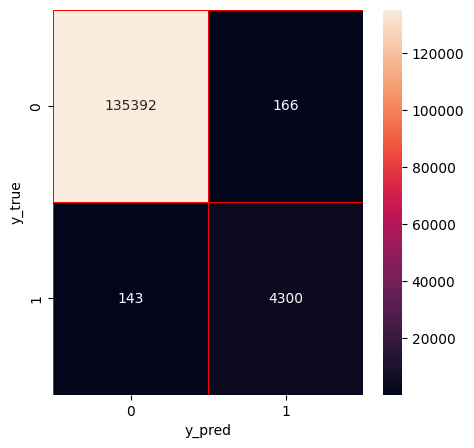

In [54]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [26]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

In [31]:
df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,120,2,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,6,0
1,59.166.0.0,33661,149.171.126.9,1024,120,2,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,6,0
2,59.166.0.6,1464,149.171.126.7,53,120,2,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,6,0
3,59.166.0.5,3593,149.171.126.5,53,120,2,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,6,0
4,59.166.0.3,49664,149.171.126.0,53,120,2,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,114,5,0.020383,320,1874,31,...,0,8,20,7,5,1,1,4,6,0
699997,59.166.0.0,18895,149.171.126.9,80,114,5,1.402957,19410,1087890,31,...,0,1,1,2,7,2,2,2,6,0
699998,59.166.0.0,30103,149.171.126.5,5190,114,5,0.007108,2158,2464,31,...,0,13,13,6,7,2,1,2,6,0
699999,59.166.0.6,30388,149.171.126.5,111,120,2,0.004435,568,304,31,...,0,10,13,6,5,1,1,3,6,0


In [45]:
columns_to_drop = []
for i in df.columns:
    if(df[i].dtype == "object"):
        columns_to_drop.append(i)
print(columns_to_drop)
df_temp = df.drop(columns=columns_to_drop)

['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'attack_cat']


In [42]:
df_temp=df

In [46]:
X = df_temp.drop(['Label'],axis=1).values 
y = df_temp.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

Accuracy of DT: 0.9977214448468226
Precision of DT: 0.9977258835281572
Recall of DT: 0.9977214448468226
F1-score of DT: 0.9977235488202182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    135558
           1       0.96      0.97      0.96      4443

    accuracy                           1.00    140001
   macro avg       0.98      0.98      0.98    140001
weighted avg       1.00      1.00      1.00    140001



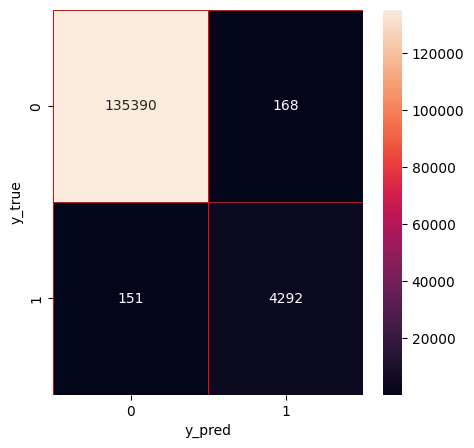

In [47]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()